In [64]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [65]:
X = pd.read_csv("./digit-recognizer/train.csv", sep=",")
Y = pd.read_csv("./digit-recognizer/test.csv", sep=",")

sample_submission = pd.read_csv("./digit-recognizer/sample_submission.csv", sep=",")

In [66]:
X.head(5)
# (42000, 785)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
Y.head(5)
# (28000, 784)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
label = X['label']
label

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, X['label'], test_size=0.2, random_state=42)

Y_train = LabelBinarizer().fit_transform(Y_train)
Y_test  = LabelBinarizer().fit_transform(Y_test)

X_train = X_train.drop(columns=['label'])
X_test  = X_test.drop(columns=['label'])

X_train = X_train / 255.0
X_test  = X_test / 255.0

print("Train X dataset shape: ", np.shape(X_train))
print("Train y dataset shape: ", np.shape(Y_train))

print("Test X dataset shape: ", np.shape(X_test))
print("Test y dataset shape: ", np.shape(Y_test))

Train X dataset shape:  (33600, 784)
Train y dataset shape:  (33600, 10)
Test X dataset shape:  (8400, 784)
Test y dataset shape:  (8400, 10)


In [70]:
# Define Sequential model with 2 layers
def create_classifier():
    input = Input(shape=(784,))

    x = Dense(520, activation='sigmoid')(input) # Input * (2/3)

    output = Dense(10, activation='softmax')(x)

    return Model(input, output)


model = create_classifier()
model.summary()


model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer = Adam())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 520)               408200    
                                                                 
 dense_9 (Dense)             (None, 10)                5210      
                                                                 
Total params: 413410 (1.58 MB)
Trainable params: 413410 (1.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
history = model.fit(X_train, Y_train, epochs=150, batch_size=30, validation_data=(X_test, Y_test), verbose=1, workers=8)

Epoch 1/150
1120/1120 [==============================] - 5s 5ms/step - loss: 0.0778 - accuracy: 0.9774 - val_loss: 0.1172 - val_accuracy: 0.9650
Epoch 2/150
1120/1120 [==============================] - 5s 5ms/step - loss: 0.0605 - accuracy: 0.9824 - val_loss: 0.1000 - val_accuracy: 0.9700
Epoch 3/150
1120/1120 [==============================] - 5s 5ms/step - loss: 0.0470 - accuracy: 0.9864 - val_loss: 0.0914 - val_accuracy: 0.9721
Epoch 4/150
1120/1120 [==============================] - 5s 5ms/step - loss: 0.0349 - accuracy: 0.9906 - val_loss: 0.1044 - val_accuracy: 0.9676
Epoch 5/150
1120/1120 [==============================] - 5s 5ms/step - loss: 0.0264 - accuracy: 0.9932 - val_loss: 0.0932 - val_accuracy: 0.9724
Epoch 6/150
1120/1120 [==============================] - 5s 5ms/step - loss: 0.0202 - accuracy: 0.9951 - val_loss: 0.0902 - val_accuracy: 0.9737
Epoch 7/150
1120/1120 [==============================] - 5s 5ms/step - loss: 0.0156 - accuracy: 0.9961 - val_loss: 0.0869 - val_ac

In [73]:
pred = model.predict(Y)

875/875 [==============================] - 1s 1ms/step


In [ ]:
df = pd.DataFrame(columns=["ImageId","Label"])

df.Label   = [_.argmax() for _ in pred]
df.ImageId = df.index+1
df.to_csv("./digit-recognizer/submission.csv", index = False)

df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [ ]:
def plot_losses(history):
    plt.rcParams['figure.figsize'] = [20, 5]
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

    ax1.set_title('Losses')
    ax1.set_xlabel('epoch')
    ax1.legend(loc="upper right")
    ax1.grid()
    ax1.plot(history['loss'], label='Training loss')
    ax1.plot(history['val_loss'], label='Validation loss')
    ax1.legend()

    ax2.set_title('Accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend(loc="upper right")
    ax2.grid()
    ax2.plot(history['accuracy'], label='Training accuracy')
    ax2.plot(history['val_accuracy'], label='Validation accuracy')
    ax2.legend()

    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


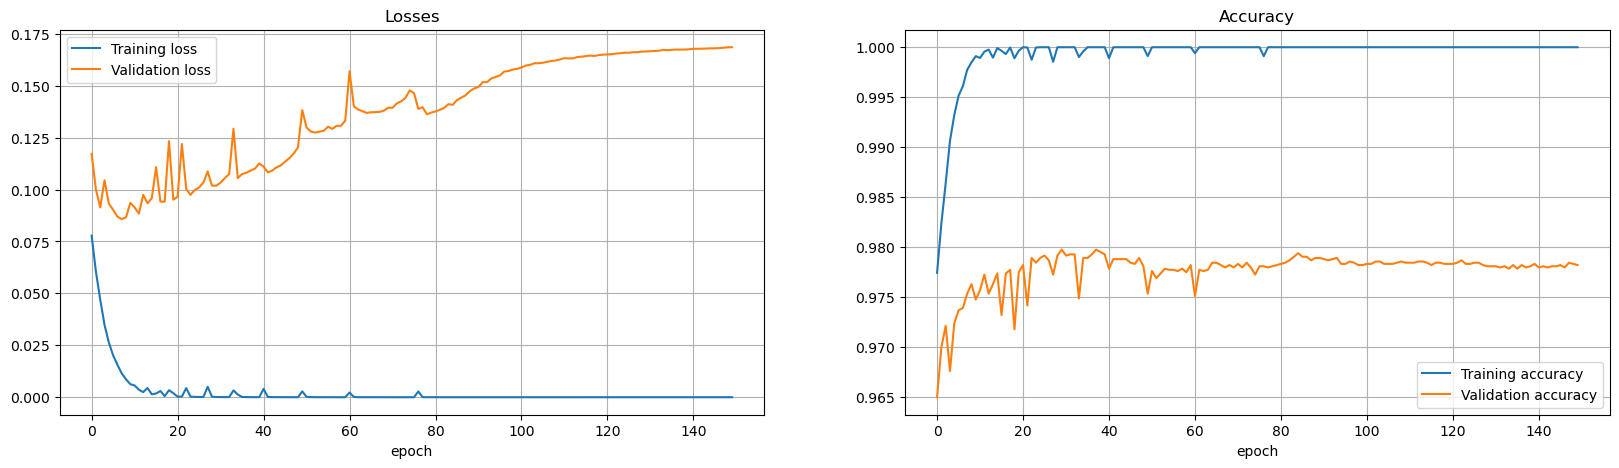

In [ ]:
plot_losses(history.history)